In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import random
import csv
from collections import defaultdict
from math import e
from math import pi
import requests
import re

In [2]:
#loading features of the pigeons(square) dataset
feature1= pd.read_csv('Pigeons_29033_960_540_300f_DataH10.csv', header=None)
feature2= pd.read_csv('Pigeons_29033_960_540_300f_DataHOG.csv', header=None)
feature3= pd.read_csv('Pigeons_29033_960_540_300f_DataLBP.csv', header=None)
feature4= pd.read_csv('Pigeons_29033_960_540_300f_DataRGB.csv', header= None)

In [6]:
feature1.describe()

,0,1,2,3,4,5,6,7,8,9
count,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000
mean,0.081004,0.005544,0.001691,0.001345,0.003595,0.504157,0.302404,0.031709,0.021851,0.046699
std,0.095011,0.008128,0.002705,0.002533,0.005891,0.194638,0.108065,0.021825,0.017083,0.038528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.089286,0.031888,0.000000,0.000000,0.000000
25%,0.005102,0.000000,0.000000,0.000000,0.000000,0.344388,0.232143,0.013712,0.008610,0.016582
50%,0.033163,0.001913,0.000638,0.000638,0.001594,0.484694,0.309311,0.029018,0.018814,0.037309
75%,0.151467,0.008291,0.002232,0.001913,0.004464,0.631378,0.374681,0.045599,0.030612,0.069515
max,0.559311,0.058992,0.029656,0.051658,0.088967,0.968112,0.633291,0.160714,0.138712,0.205995


In [5]:
feature2.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,...,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000
mean,0.338967,0.215117,0.240169,0.339521,0.465642,0.296089,0.200906,0.177464,0.190199,0.344331,...,0.189301,0.298789,0.178984,0.207392,0.367993,0.514794,0.281144,0.166681,0.142568,0.166512
std,0.146339,0.181896,0.168825,0.175496,0.162422,0.175722,0.159440,0.160864,0.176199,0.134724,...,0.182790,0.166755,0.177986,0.172476,0.198134,0.191044,0.177420,0.156779,0.159347,0.184384
min,0.000000,0.000000,0.000000,0.000000,0.007649,0.000000,0.000000,0.000000,0.000000,0.019247,...,0.000000,0.009572,0.000000,0.000000,0.000000,0.017001,0.000000,0.000000,0.000000,0.000000
25%,0.225945,0.040440,0.077009,0.199546,0.384501,0.136491,0.049993,0.026696,0.015525,0.243878,...,0.015275,0.134434,0.012202,0.043769,0.206648,0.396797,0.120329,0.029129,0.000000,0.000000
50%,0.377887,0.179919,0.239972,0.377431,0.436606,0.341735,0.170184,0.130734,0.139199,0.373909,...,0.130335,0.346887,0.111006,0.167795,0.400233,0.481313,0.295247,0.114298,0.073210,0.081581
75%,0.434312,0.380410,0.388508,0.455122,0.533850,0.425484,0.361179,0.343728,0.363255,0.432533,...,0.358300,0.425800,0.356695,0.375844,0.522342,0.635995,0.417607,0.298018,0.254682,0.338679
max,0.948089,0.854925,0.764304,0.709117,0.998824,0.706303,0.574520,0.721917,0.704471,0.944479,...,0.706573,0.852771,0.692230,0.701533,0.705956,0.999954,0.701482,0.610153,0.632474,0.706505


In [4]:
feature3.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,...,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000
mean,0.371937,0.041657,0.013064,0.022211,0.003292,0.008028,0.024982,0.001192,0.000168,0.003345,...,0.002679,0.000112,0.001144,0.030957,0.007519,0.002657,0.021053,0.010922,0.029896,0.233240
std,0.036522,0.011302,0.003457,0.005989,0.001332,0.002259,0.006601,0.000861,0.000271,0.001447,...,0.001258,0.000199,0.000772,0.007205,0.002474,0.001188,0.006735,0.003621,0.009245,0.033034
min,0.270727,0.014031,0.001594,0.007334,0.000000,0.001913,0.005740,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009885,0.001594,0.000000,0.003827,0.000957,0.006059,0.091837
25%,0.344388,0.033801,0.010523,0.017857,0.002232,0.006378,0.020089,0.000638,0.000000,0.002232,...,0.001913,0.000000,0.000638,0.025829,0.005740,0.001913,0.016263,0.008291,0.023597,0.211735
50%,0.370536,0.040179,0.012755,0.022003,0.003189,0.007972,0.024554,0.000957,0.000000,0.003189,...,0.002551,0.000000,0.000957,0.030293,0.007334,0.002551,0.020408,0.010523,0.029018,0.232143
75%,0.395089,0.047832,0.015306,0.026148,0.004145,0.009566,0.029656,0.001594,0.000319,0.004145,...,0.003508,0.000319,0.001594,0.035395,0.009247,0.003508,0.025191,0.013393,0.035077,0.256378
max,0.511798,0.083546,0.027423,0.056122,0.008929,0.016901,0.048469,0.006059,0.002232,0.008929,...,0.008929,0.001276,0.005102,0.067602,0.018495,0.007972,0.063138,0.025191,0.069515,0.356186


In [3]:
feature4.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,...,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000
mean,0.001614,0.001871,0.002281,0.000633,0.000556,0.000549,0.001726,0.001915,0.002327,0.000601,...,0.001738,0.000634,0.000601,0.000637,0.001369,0.001576,0.001934,0.000613,0.000593,0.000622
std,0.000518,0.000426,0.000402,0.000277,0.000255,0.000261,0.000630,0.000462,0.000439,0.000195,...,0.000479,0.000181,0.000160,0.000161,0.000551,0.000458,0.000448,0.000218,0.000194,0.000207
min,0.000210,0.000453,0.000707,0.000026,0.000023,0.000022,0.000209,0.000516,0.000836,0.000078,...,0.000339,0.000050,0.000040,0.000061,0.000196,0.000361,0.000541,0.000079,0.000068,0.000059
25%,0.001283,0.001633,0.002067,0.000427,0.000354,0.000341,0.001264,0.001576,0.002022,0.000461,...,0.001385,0.000520,0.000503,0.000535,0.001020,0.001294,0.001635,0.000464,0.000464,0.000483
50%,0.001583,0.001891,0.002353,0.000613,0.000549,0.000566,0.001633,0.001919,0.002398,0.000598,...,0.001734,0.000613,0.000586,0.000627,0.001232,0.001503,0.001912,0.000572,0.000580,0.000631
75%,0.001924,0.002111,0.002529,0.000804,0.000727,0.000720,0.002203,0.002259,0.002646,0.000721,...,0.002028,0.000741,0.000687,0.000726,0.001588,0.001751,0.002201,0.000715,0.000694,0.000760
max,0.003147,0.003226,0.003447,0.001444,0.001424,0.001398,0.003400,0.003114,0.003526,0.001652,...,0.003426,0.001388,0.001227,0.001202,0.003482,0.003350,0.003657,0.001542,0.001365,0.001362


Assuming normalization has been done during preprocessing since there is no wild observable difference in magnitude between column values

In [7]:
#load target variable file
pigeons_label= pd.read_csv('Pigeons_29033_960_540_300f_Labels.csv', header=None)

## 1. Implementing a Prior classifier without using a Python library 

In [8]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.conditional_probs = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Compute class priors
        self.class_priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / n_samples
        
        # Compute conditional probabilities
        self.conditional_probs = {}
        for i in range(n_features):
            feature_values = np.unique(X[:, i])
            for j, c in enumerate(self.classes):
                class_data = X[y == c, :]
                self.conditional_probs[(i, c)] = {}
                for value in feature_values:
                    self.conditional_probs[(i, c)][value] = (np.sum(class_data[:, i] == value) + 1) / (len(class_data) + len(feature_values))
    
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            joint_probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute the joint probability of the features and the class
                joint_prob = np.log(self.class_priors[j])
                for k in range(X.shape[1]):
                    if (k, c) in self.conditional_probs:
                        if X[i, k] in self.conditional_probs[(k, c)]:
                            joint_prob += np.log(self.conditional_probs[(k, c)][X[i, k]])
                        else:
                            # Handle unseen feature values by assigning a small probability
                            joint_prob += np.log(1 / (len(self.conditional_probs[(k, c)]) + 1))
                    else:
                        # Handle unseen features by assigning a small probability
                        joint_prob += np.log(1 / (X[:, k].max() + 1))
                joint_probs[j] = joint_prob
            # Assign the class with the highest joint probability as the predicted class
            y_pred[i] = self.classes[np.argmax(joint_probs)]
        return y_pred
    
#This code defines a Naive Bayes classifier(because it makes a new observation to the class with the highest prior probability) without a python library.
#The NaiveBayesClassifier class has three main components: class_priors, conditional_probs, and classes.
#The class_priors attribute stores the prior probability of each class in the training data.
#The conditional_probs attribute stores the conditional probability of each feature value given a class.
#The classes attribute stores the unique classes in the training data.
#The fit method fits the Naive Bayes model to the training data X and class labels y by computing the class priors and conditional probabilities.
#The predict method predicts the class labels for new data X using the fitted model.

In [9]:
#creating a dataset containing target and feature variables
pigeons_dataset= pd.concat([feature1, feature2, feature3, feature4, pigeons_label],axis=1)
pigeons_dataset.shape

(4389, 556)

In [10]:
pigeons_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,0
0,0.014031,0.000000,0.000000,0.000000,0.002551,0.814732,0.155931,0.005102,0.002551,0.005102,...,0.000959,0.000917,0.000891,0.001356,0.001751,0.002273,0.000590,0.000542,0.000546,19
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.900191,0.098852,0.000957,0.000000,0.000000,...,0.000435,0.000485,0.000567,0.001045,0.001544,0.002135,0.000268,0.000284,0.000324,0
2,0.018176,0.000000,0.000000,0.000000,0.000000,0.574617,0.245217,0.044324,0.041773,0.075893,...,0.000726,0.000636,0.000641,0.001196,0.001551,0.002029,0.000530,0.000543,0.000577,7
3,0.080676,0.017219,0.010523,0.003189,0.008610,0.394133,0.339923,0.029656,0.025191,0.090880,...,0.000779,0.000656,0.000640,0.001203,0.001479,0.001848,0.000381,0.000410,0.000450,10
4,0.165816,0.007015,0.003508,0.001913,0.001276,0.281888,0.406250,0.043686,0.023597,0.065051,...,0.000841,0.000643,0.000533,0.000863,0.001065,0.001403,0.000671,0.000541,0.000510,1


In [11]:
#splitting pigeons dataset into training and testing data according to sizes given: 2148 2241
data_train= pigeons_dataset.iloc[:2148, :]  #2148 rows, all columns
data_test=  pigeons_dataset.iloc[:2241, :]  #2241 rows, all columns

In [15]:
#creating training data for features
#converting to numpy as NB without python library cannot directly compute both dataframe and numpy array 
x= data_train.iloc[:,:-1].to_numpy()  #iloc selects all rows from the train dataset and all columns except the last column
x.shape

(2148, 555)

In [14]:
#creating testing data for features 
x_test= data_test.iloc[:, :-1].to_numpy()   #iloc selects all rows from the test dataset and all columns except the last column
x_test.shape

(2241, 555)

In [16]:
#creating training data for target variable
y = data_train.iloc[:,-1]     #iloc selects all rows from the train dataset and only the last column
y.shape

(2148,)

In [17]:
#creating testing data for target variable
y_test= data_test.iloc[:, -1].to_numpy()  #iloc selects all rows from the test dataset and only the last column
y_test.shape

(2241,)

In [18]:
#creating naive bayes object
nb =NaiveBayesClassifier()

In [19]:
# Train the classifier on the dataset
nb.fit(x, y)

In [20]:
# Make predictions on the same dataset
y_pred = nb.predict(x_test)

In [21]:
# Compute the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9785809906291834


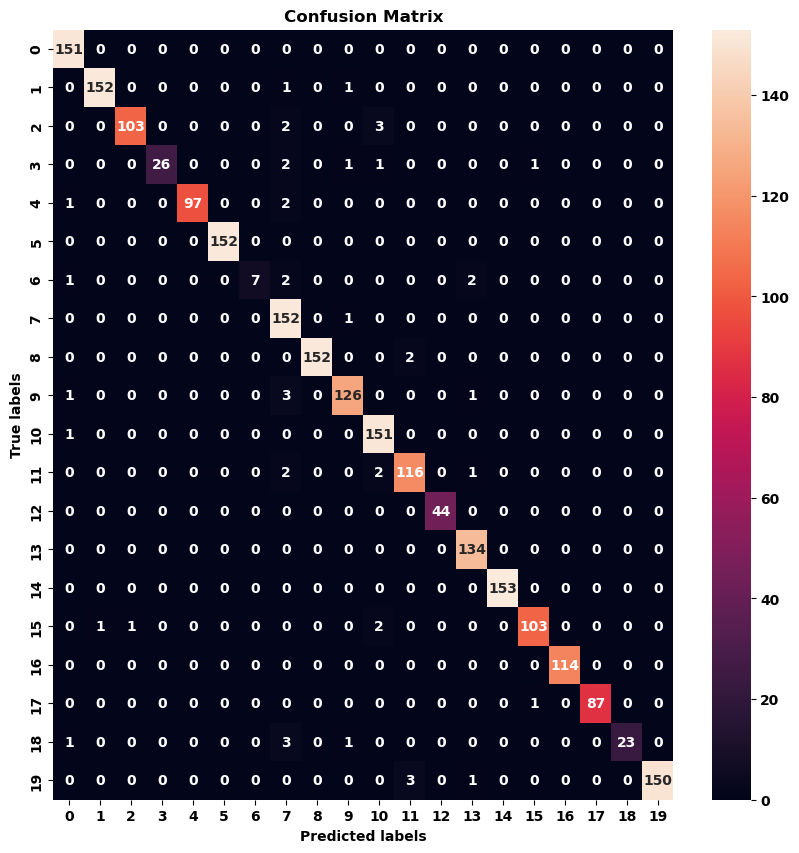

In [31]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax) #annot= writes the number of times it predicts correctly/wrong
                                                        #fmt= converts to whole integer
                                                        #cmap= specifies colours 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("nb_pigeons(square)_confusion_matrix.png")
plt.show()

In [32]:
#concatenating all features 
pigeons_features = pd.concat([feature1, feature2, feature3, feature4],axis=1)

In [33]:
#converting to numpy array because sklearn expects target variable to be in numpy array
pigeons_labels= pigeons_label.to_numpy()

In [34]:
#spliting dataframe into given training and testing sizes: 2148 2241
training=  2148
testing=  2241
test_size = testing / (training + testing)
test_size 

0.5105946684894054

In [35]:
#train test split
# X is the input features and y is the target variable
X_train, X_test, Y_train, Y_test = train_test_split(pigeons_features, pigeons_labels, test_size=test_size, random_state=42)

# test_size specifies the proportion of the dataset to include in the test split
# random_state ensures that the same random split is generated each time the code is run

In [36]:
print(X_train.shape, Y_train.shape)

(2148, 555) (2148, 1)


In [37]:
print(X_test.shape, Y_test.shape)

(2241, 555) (2241, 1)


## 2. Bagging Classifier

In [38]:
# create the base classifier
base_classifier = DecisionTreeClassifier()

# create the ensemble classifier using bagging
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, 
                                        n_estimators=10, 
                                        random_state=42)

# fit the model on training data
bagging_classifier.fit(X_train, Y_train)

# predict the class labels for test data
bagging_pred = bagging_classifier.predict(X_test)

# evaluate the performance of the classifier
bagging_acc= accuracy_score(Y_test, bagging_pred)
print("Bagging Accuracy: {:.2f}".format(bagging_acc))

Bagging Accuracy: 0.88


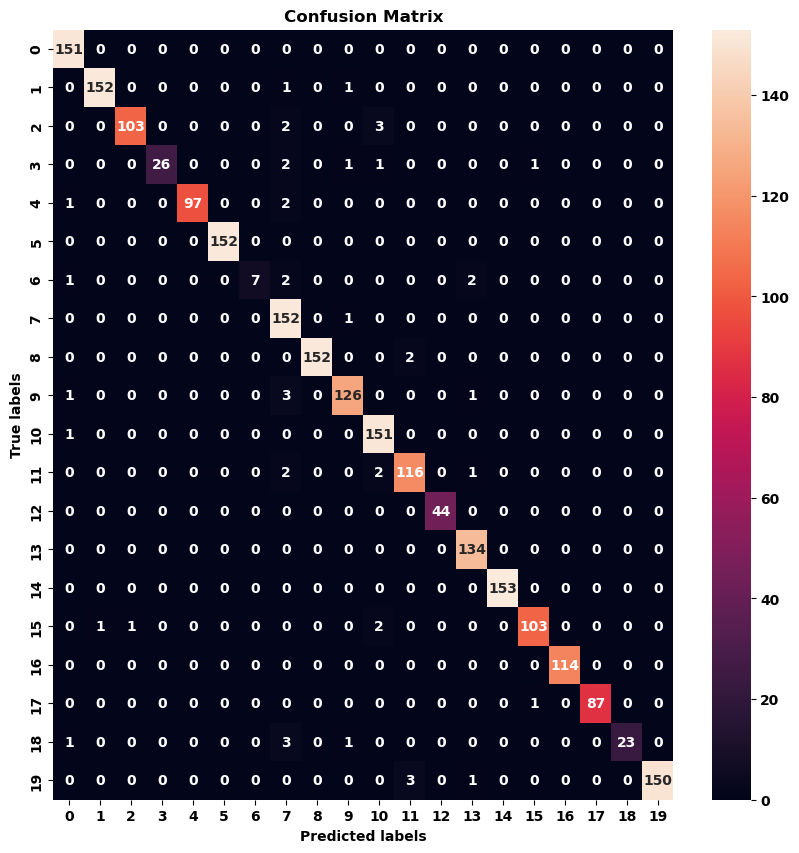

In [39]:
# Create a confusion matrix
cm_bag = confusion_matrix(Y_test, bagging_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("bagging_pigeons(square)_confusion_matrix.png")
plt.show()

## 3. Linear Discriminant Analysis Classifier

In [40]:
# Create an instance of the LDA model
LDA = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the testing data
LDA_pred = LDA.predict(X_test)

#evaluate the performance of the classifier
LDA_acc = accuracy_score(Y_test, LDA_pred)
print("LDA Accuracy: {:.2f}".format(LDA_acc))

LDA Accuracy: 0.98


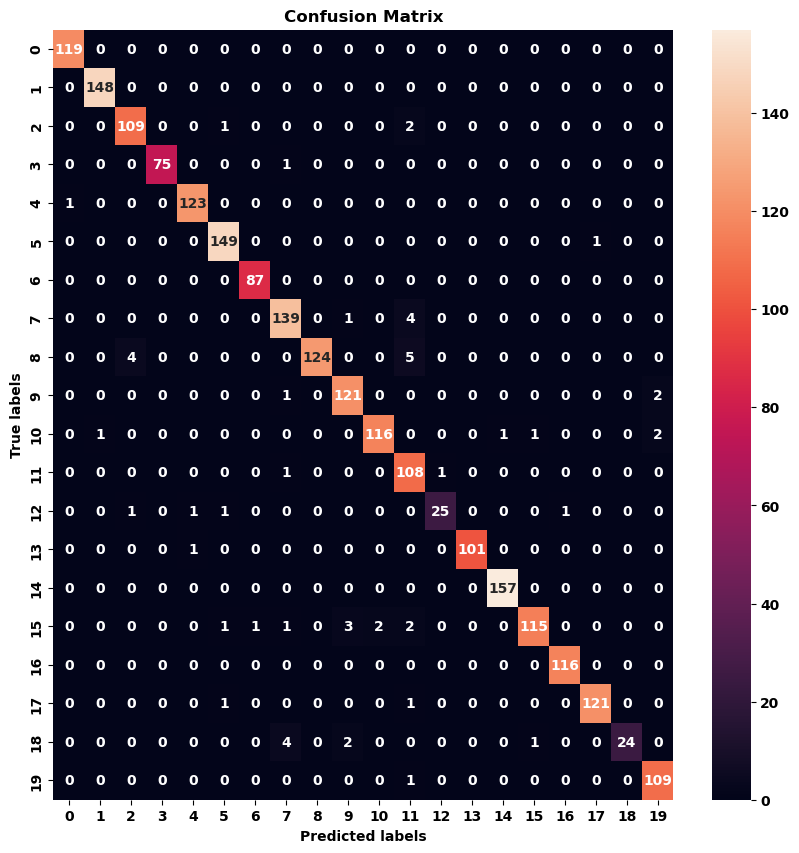

In [41]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, LDA_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("LDA_pigeons(square)_confusion_matrix.png")

plt.show()

## 4. KNeighbors Classifier

In [42]:
# Create an instance of the KNN model with k=5
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the testing data
KNN_pred = KNN.predict(X_test)

#evaluate the performance of the classifier
KNN_acc = accuracy_score(Y_test, KNN_pred)
print("KNN Accuracy: {:.2f}".format(KNN_acc))

KNN Accuracy: 0.94


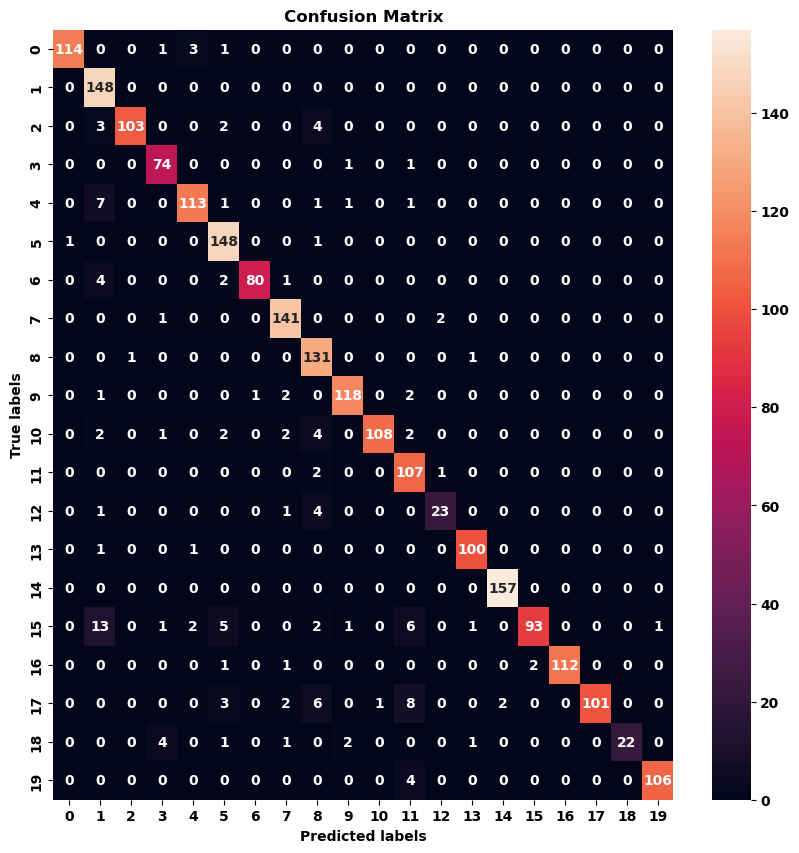

In [43]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, KNN_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("KNN_pigeons(square)_confusion_matrix.png")
plt.show()

## 5. Decision Tree Classifier

In [44]:
# Create an instance of the Decision Tree model with max depth of 30
Tree = DecisionTreeClassifier(max_depth=30)

# Fit the Decision Tree model to the training data
Tree.fit(X_train, Y_train)

# Predict the target values for the testing data
Tree_pred = Tree.predict(X_test)

#evaluate the performance of the classifier
Tree_acc = accuracy_score(Y_test, Tree_pred)
print("Decision Tree Accuracy: {:.2f}".format(Tree_acc))

Decision Tree Accuracy: 0.76


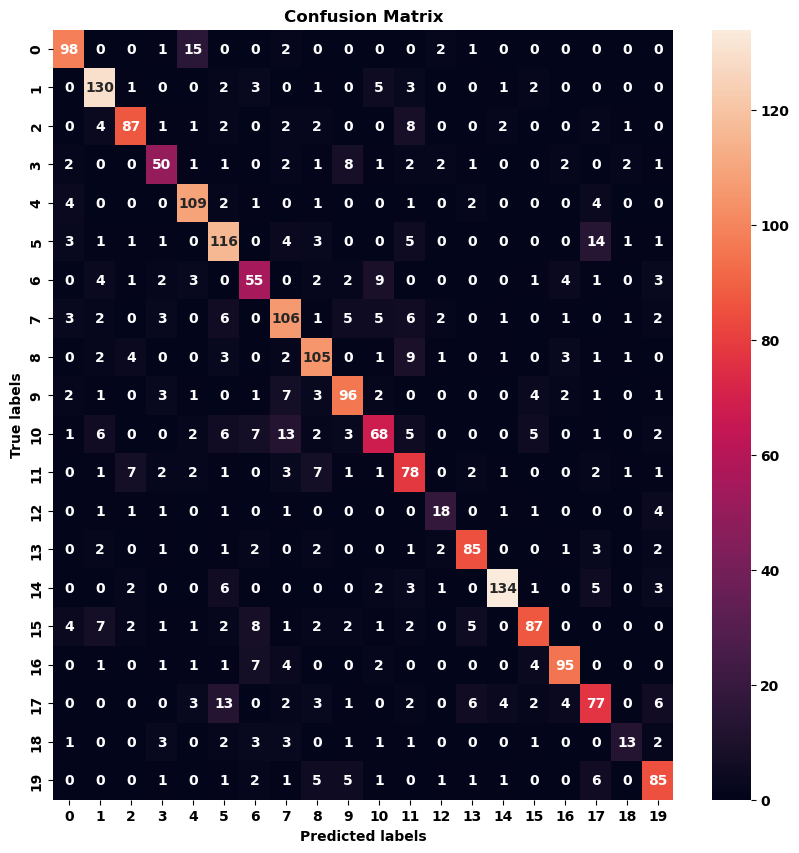

In [45]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Tree_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("Tree_pigeons(square)_confusion_matrix.png")
plt.show()

## 6. Random Forest Classifier

In [46]:
# Create an instance of the Random Forest model with 100 trees
RFC = RandomForestClassifier()

# Fit the Random Forest model to the training data
RFC.fit(X_train, Y_train)

# Predict the target values for the testing data
RFC_pred = RFC.predict(X_test)

#evaluate the performance of the classifier
RFC_acc = accuracy_score(Y_test, RFC_pred)
print("Random Forest Accuracy: {:.2f}".format(RFC_acc))

Random Forest Accuracy: 0.96


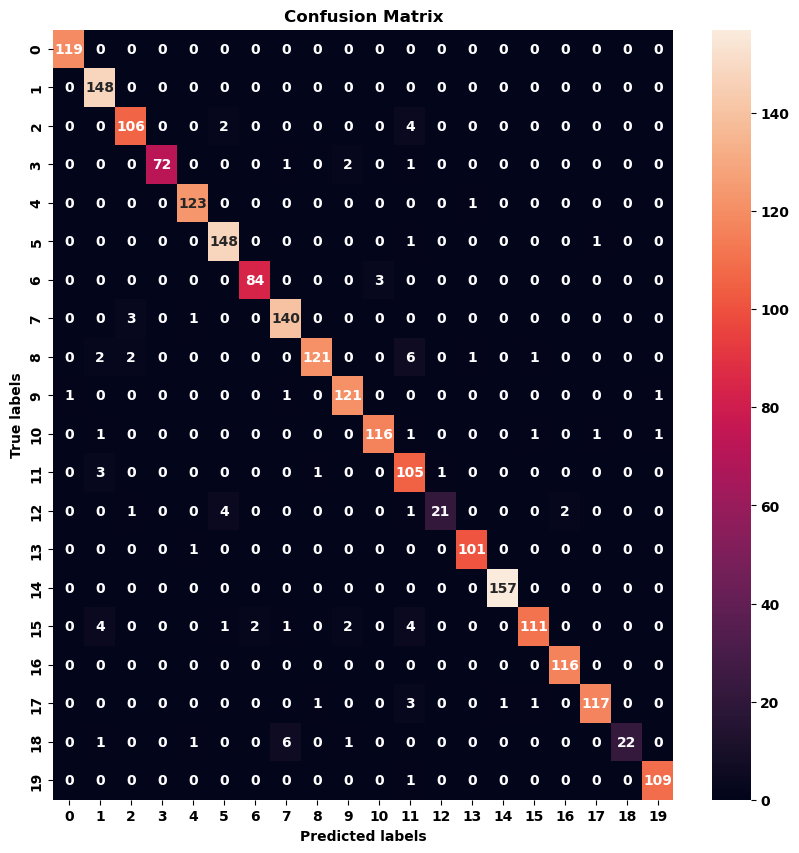

In [47]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, RFC_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("rfc_pigeons(square)_confusion_matrix.png")
plt.show()

## 7. SVM model

In [48]:
# Create an instance of the SVM model
svm = SVC(kernel='linear', C=1)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Predict the target values for the testing data
svm_pred = svm.predict(X_test)

#evaluate the performance of the classifier
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy: {:.2f}".format(svm_acc))

SVM Accuracy: 0.94


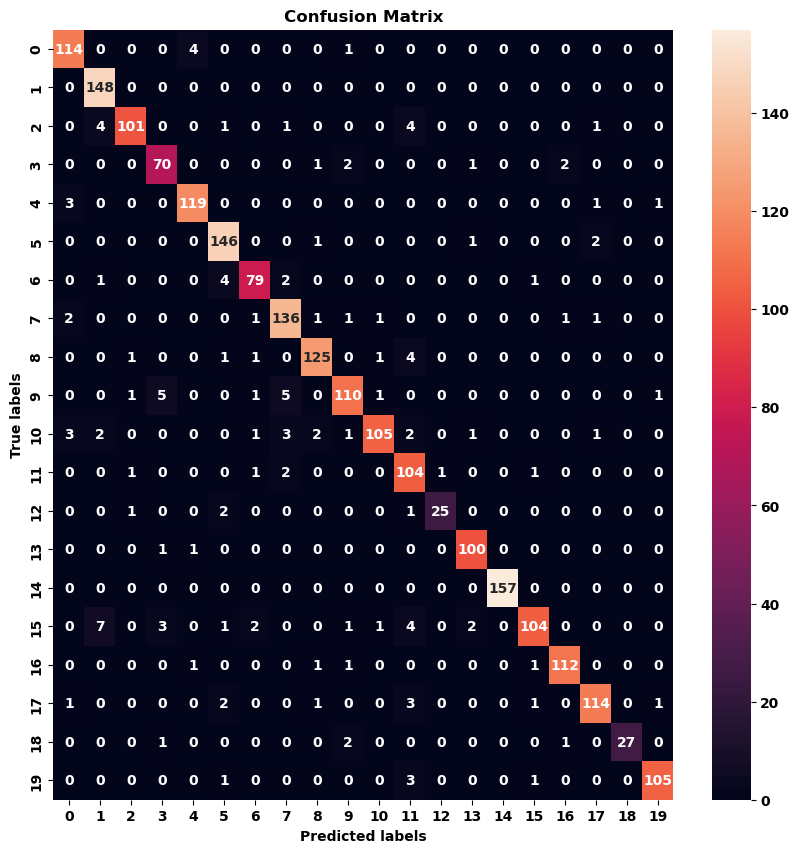

In [49]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, svm_pred)

# Create a heatmap of the confusion matrix
fig, ax= plt.subplots(1,1, figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("svm_pigeons(square)_confusion_matrix.png")
plt.show()

In [50]:
# Create a dictionary of the accuracy scores
results = {'Classifier': ['Largest prior', 'Decision Tree', 'KNN', 'Bagging', 'SVM', 'LDA', 'Random Forest'],
           'Accuracy': [accuracy, Tree_acc, KNN_acc, bagging_acc, svm_acc, LDA_acc, RFC_acc]}

# Create a Pandas dataframe from the dictionary
df_pigeons_square_results = pd.DataFrame(results)

# Sort the dataframe by accuracy in descending order
df_pigeons_square_results = df_pigeons_square_results.sort_values(by='Accuracy', ascending=False)

# Print the dataframe
df_pigeons_square_results

,Classifier,Accuracy
0,Largest prior,0.978581
5,LDA,0.975457
6,Random Forest,0.962517
4,SVM,0.937528
2,KNN,0.936635
3,Bagging,0.881303
1,Decision Tree,0.755020


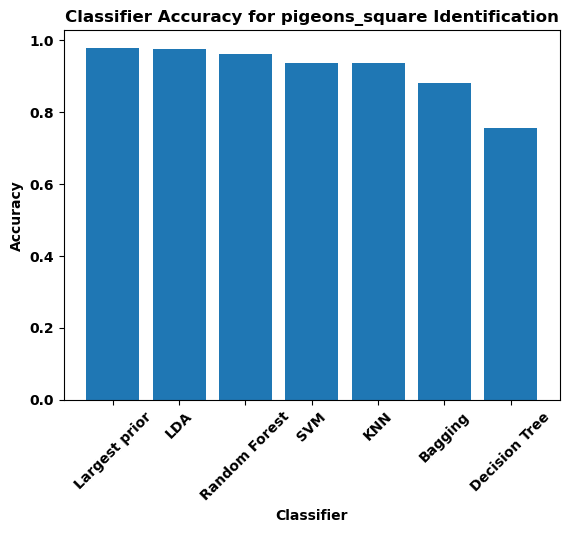

In [51]:
# Create a bar chart of the accuracy scores
plt.bar(df_pigeons_square_results['Classifier'], df_pigeons_square_results['Accuracy'])
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for pigeons_square Identification')

plt.savefig("barchart showing pigeons_square Classifier Accuracy.png")
plt.show()